<h1>Heart disease analysis

<h2>Dataset description

Dataset source: https://www.kaggle.com/ronitf/heart-disease-uci <br><br>
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.<br>
More information also available at https://www.kaggle.com/ronitf/heart-disease-uci/discussion/105877

Three data frames with 303 observations on the following 14 variables.

Attribute Information:

<li> "age", age in years
<li> "sex", sex (1: male; 0: female)
<li> "cp", chest pain type. 0: asymptomatic, 1: atypical angina, 2: non-anginal pain, 3: atypical angina
<li> "trestbps", resting blood pressure (in mm Hg on admission to the hospital)
<li> "chol", serum cholestoral in mg/dl
<li> "fbs", (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
<li> "restecg", resting electrocardiographic results. 0: showing probable or definite left ventricular hypertrophy by Estes\' criteria, 1: normal, 2: having ST-T wave abnormality (T wave inversions and/or ST, elevation or depression of > 0.05 mV)  
<li> "thalach", maximum heart rate achieved
<li> "exang", exercise induced angina (1 = yes; 0 = no)
<li> "oldpeak", ST depression induced by exercise relative to rest
<li> "slope", the slope of the peak exercise ST segment 0: downsloping, 1: flat, 2: upsloping   
<li> "ca", number of major vessels (0-3) colored by flourosopy, null values are coded as 4
<li> "thal" (thalassemia), 1: fixed defect, 2: normal, 3: reversable defect, null values are coded as 0
<li> "target", diagnosis of heart disease (angiographic disease status). 0: disease 1: no disease

<h2> Hypotheses

There are a lot of factors that might be associated with heart diseases: 
<li> male gender
<li> older age
<li> stronger chest pain   
<li> higher blood pressure
<li> higher cholestoral level   
<li> higher sugar levels
<li> anormalities detected in exams
<li> blood disorders
<li> higher maximum heart rate
<li> number of vessels coloured by flourosopy

In [1]:
import pandas as pd

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<h2> Sanity checks

Which columns have categorical data? What about numerical data?

From the description, "sex", "fbs","exang", "cp", "restecg","slope","thal","ca" are categorical.

Similarly, "age", "trestbps", "chol", "thalach","oldpeak" are numerical.<br>
All categorical features can be coded as numerical.

In [3]:
categorical = ['sex', 'fbs','exang','cp', 'restecg','slope','thal','ca']
numerical = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

The target variable is categorical, containing only 0 or 1 values

In [4]:
target = 'target'

Does those columns have any null values?

"thal" = 0 "ca" = 4 are coded as null values

In [5]:
import numpy as np 

df['thal'] = df['thal'].replace({0:np.NaN})
df['ca'] = df['ca'].replace({4:np.NaN})

df.isnull().any().any()

True

In [6]:
df.shape[0] - df.dropna().shape[0]

7

There are 7 data rows that have null values in "ca" and/or "thal". Those rows can be filled with the most frequent value of each feature, respectively.

In [7]:
thal_frequent = df['thal'].value_counts(ascending=False).index[0]
df['thal'] = df['thal'].replace({np.NaN:thal_frequent})
ca_frequent = df['ca'].value_counts(ascending=False).index[0]
df['ca'] = df['ca'].replace({np.NaN:ca_frequent})

df.isnull().any().any()

False

<h3> Data wrangling

Some variables can be coded as numeric by reordeing values:
<li> "cp", from 0:asymptomatic, 1: atypical angina, 2: non-anginal pain, 3: atypical angina to 0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic
<li> "thal", from 1: fixed defect, 2: normal, 3: reversable defect to 1: normal; 2: fixed defect; 3: reversable defect
<li> "restecg", from 0: showing ventricular hypertrophy, 1: normal, 2: having abnormality to 0: normal, 1: having abnormality, 2: showing ventricular hypertrophy
<br><br>
Also, to improve readability, the target variable will be coded to 0: no disease, 1: disease and "slope", from 0: downsloping, 1: flat, 2: upsloping to from 1: upsloping, 2: flat, 3: downsloping.

In [8]:
df['cp'] = df['cp'].replace({
    0:3,
    1:1,
    2:2,
    3:1,
})          
                        
df['thal'] = df['thal'].replace({
    1:2,
    2:1,
    3:3,
})

df['restecg'] = df['restecg'].replace({
    0:2,
    1:0,
    2:1,
})

df['slope'] = df['slope'].replace({
    0:3,
    1:2,
    2:1,
})

df['target'] = df['target'].replace({
    0:1,
    1:0,
})

<h3> Data distributions

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

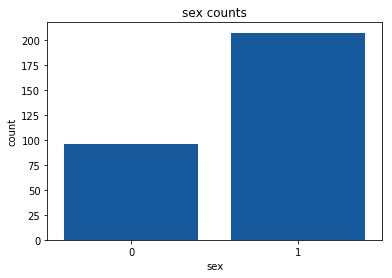

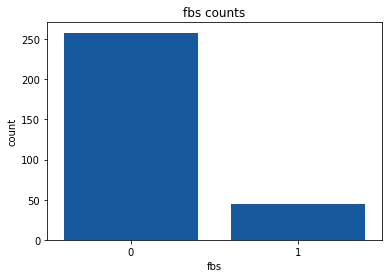

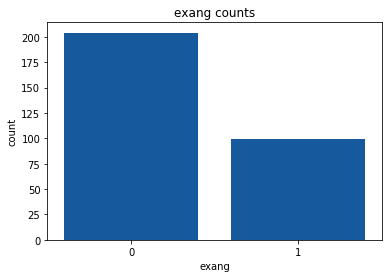

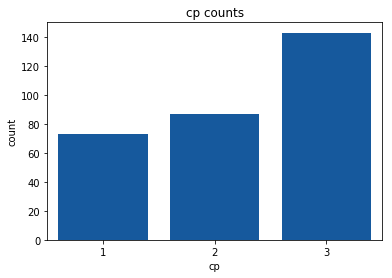

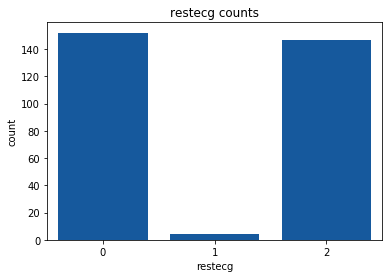

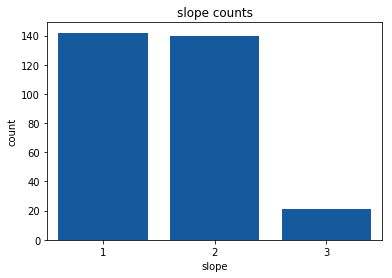

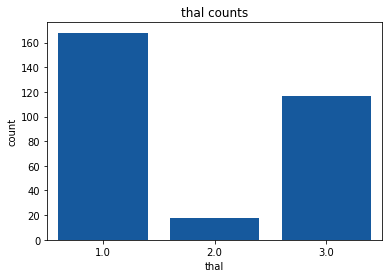

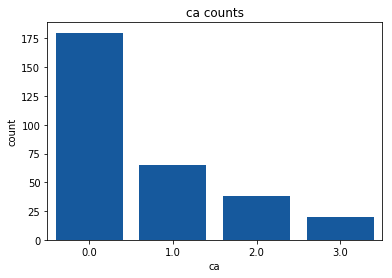

In [10]:
color = '#0059b3'
for column in categorical:
    sns.countplot(df[column],color=color)
    plt.title(column + ' counts')
    plt.show()

All features have unbalanced values.<br>
Both restecg = 1, thal = 2 and ca = 4 have low representation on the dataset.

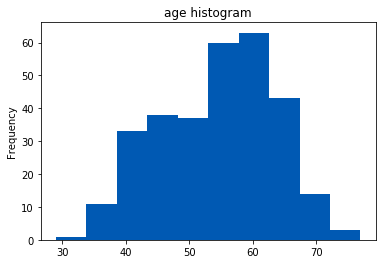

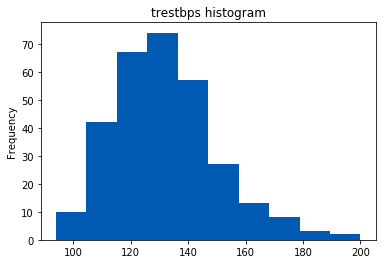

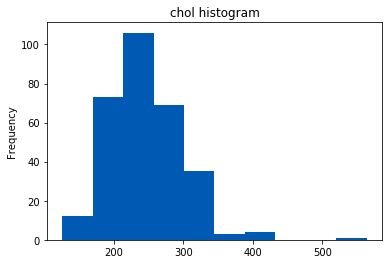

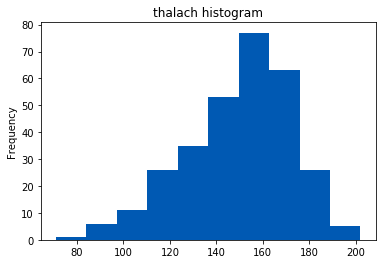

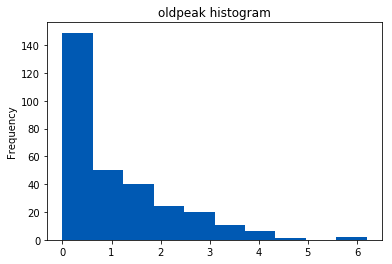

In [11]:
for column in numerical:
    df[column].plot(kind='hist',color=color)
    plt.title(column + ' histogram')
    plt.show()

Age is right skewed with mode centered around 55<br>
trestbps is left skewed with mode around 130<br>
chol is left skewed with mode around 250<br>
thalach is right skewed with mode around 150<br>
oldpeak is left skewed, mode around 0.5<br>

<h2> Bivariate analysis

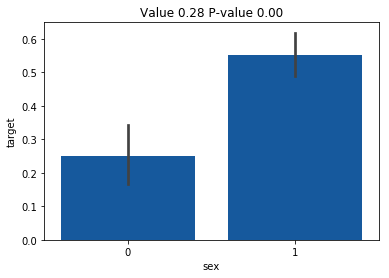

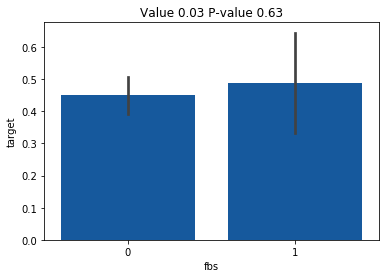

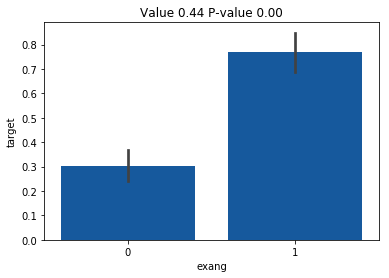

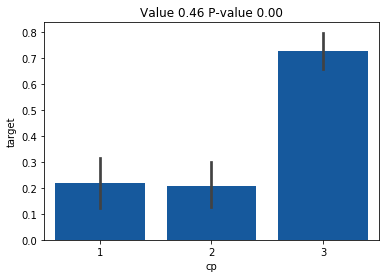

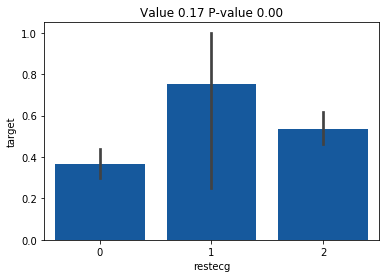

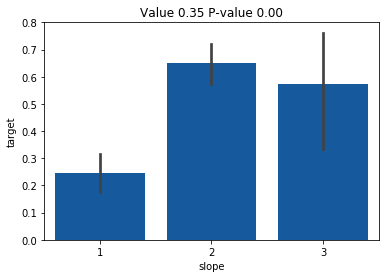

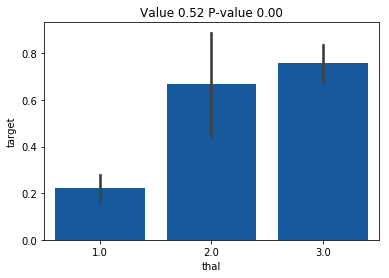

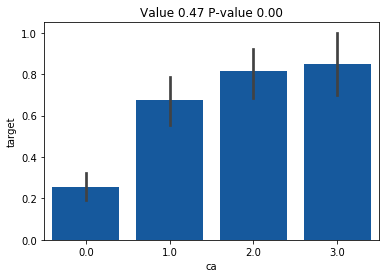

In [12]:
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

for column in categorical :
    stat, p_val = pearsonr(df[column],df[target])
    sns.barplot(x=column,y=target,data=df,color=color)
    plt.title('Value {:.2f} P-value {:.2f}'.format(stat,p_val))
    plt.show()

The hypotheses keep up with those tests since all associations are positive most all p-values are bellow 0.05.<br>
Since "fbs" test's p-value is above 0.05, this feature will be discarded.

In [13]:
categorical = [c for c in categorical if c != 'fbs']

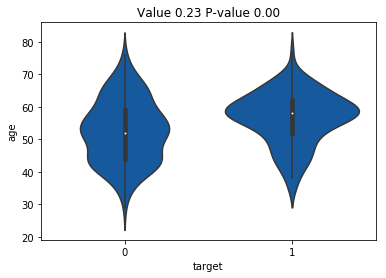

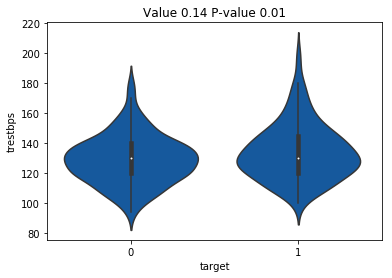

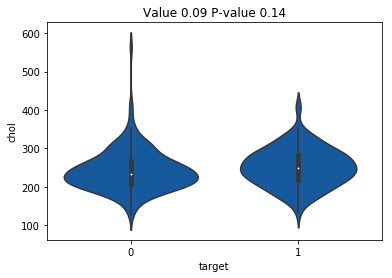

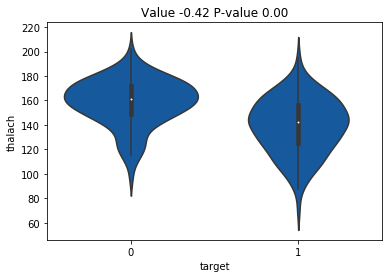

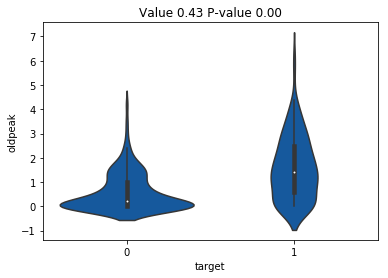

In [14]:
for column in numerical :
    stat, p_val = pearsonr(df[column],df[target])
    sns.violinplot(x=target,y=column,data=df,color=color)
    plt.title('Value {:.2f} P-value {:.2f}'.format(stat,p_val))
    plt.show()

The p-value of the "chol" feature wasn't bellow 0.05 so this feature should be discarded as well. 

Also, the negative association found between "thalach" and heart disease needs to be further questioned. 
Since this involves checking the data's source, this variable won't be used for this analysis.

In [15]:
numerical = [c for c in numerical if c not in ['chol','thalach']]

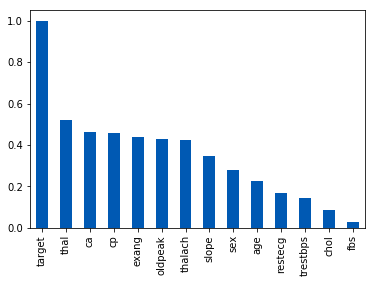

In [16]:
df.corr()['target'].abs().sort_values(ascending=False).plot(kind='bar',color=color)

The features with the strongest association are: "thal", "ca", "cp", "exang", "oldpeak", "thalach"

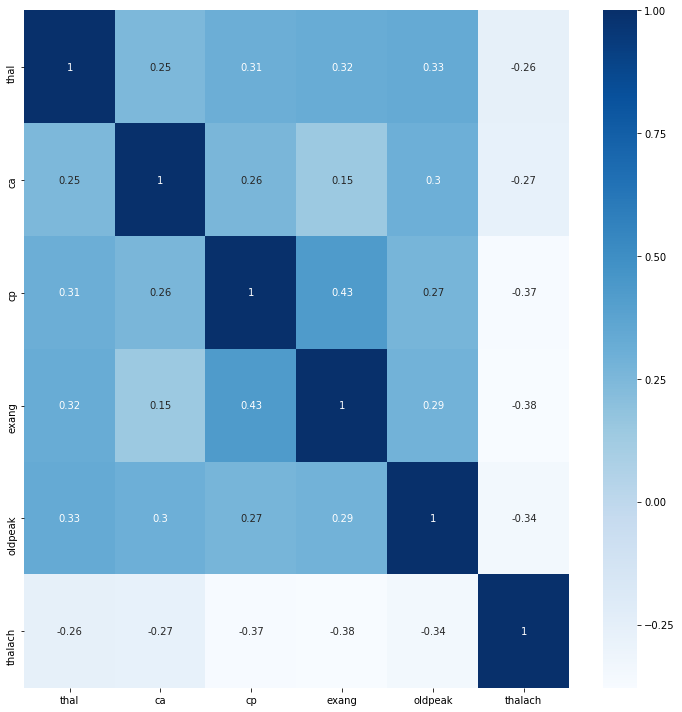

In [17]:
columns = ["thal", "ca", "cp", "exang", "oldpeak", "thalach"]

cmap= 'Blues'
plt.figure(figsize=(10,10))
sns.heatmap(df[columns].corr(),annot=True,cmap=cmap)
plt.tight_layout()
plt.show()

None of the selected features are strongly correlated with each other

<h2> Multivariate analysis

<h3> Decision tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

random_state = 100

X = df[columns]
y = df[target]

model = DecisionTreeClassifier(random_state=random_state,
                               min_impurity_decrease=.015)
model.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.015, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

<h4> Confunsion matrix and accuracy

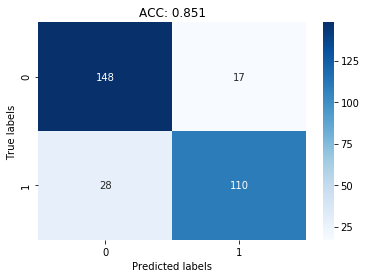

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_true = y
y_pred = model.predict(X)

def plot_cm(y_true,y_pred):
    cm = confusion_matrix(y_true,y_pred)
    sns.heatmap(cm, annot=True,cmap='Blues',fmt='g')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('ACC: {:.3f}'.format(accuracy_score(y_true,y_pred)))
    plt.show()
plot_cm(y_true,y_pred)

The decision tree model had a good performance on training data (achieved .84 accuracy)

<h4> Dummy model performance

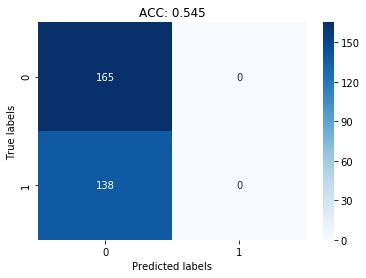

In [20]:
most_frequent = y.value_counts(ascending=False).index[0]

y_true = y
y_pred = [most_frequent] * len(y)

plot_cm(y_true,y_pred)

The dummy model using the "most frequent" value strategy was outperformed by the decision tree model by almost 31% accuracy.

<h4> Tree visualization

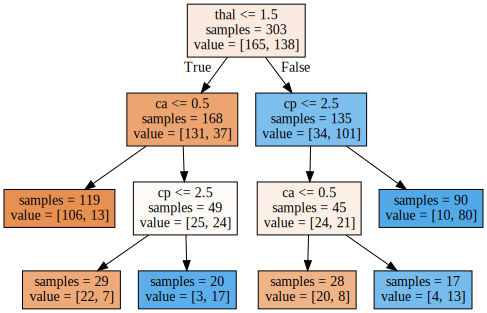

In [21]:
import graphviz
from sklearn import tree
from IPython.display import display

display(graphviz.Source(tree.export_graphviz(model,feature_names=columns,filled=True,impurity=False)))

Rules found:<br>
<li> "thal" <= 1.5 and "ca" <= 0.5: no disease<br>
<li> "thal" <= 1.5 and "ca" > 0.5 and "cp" <= 2.5: no disease<br>
<li> "thal" <= 1.5 and "ca" > 0.5 and "cp" > 2.5: no disease<br>
<li> "thal" > 1.5 and "cp" > 2.5: disease<br>
<li> "thal" > 1.5 and "cp" <= 2.5 and "ca" <= 0.5: no disease<br>
<li> "thal" > 1.5 and "cp" <= 2.5 and "ca" > 0.5: disease<br>

Some variables weren't used and need to be removed to reduce the model's complexity

In [22]:
columns = [
    c for c in columns if c not in [
    'thalach',
    'exang',
    'oldpeak',
    ]
]

X = df[columns]
y = df[target]

model = DecisionTreeClassifier(random_state=random_state,
                               min_impurity_decrease=.015,
                               min_samples_split=df.shape[0]//10)
model.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.015, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

<h4> Feature importances

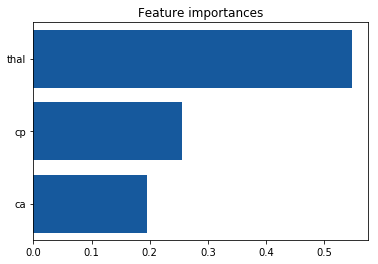

In [23]:
import numpy as np 
sort_order = np.argsort(model.feature_importances_)[::-1]
sns.barplot(
    model.feature_importances_[sort_order],
    np.array(columns)[sort_order],
    color=color, 
    orient='h'
)
plt.title('Feature importances')
plt.show()

"thal" is the most important features used by the model

In [24]:
from sklearn.inspection import plot_partial_dependence

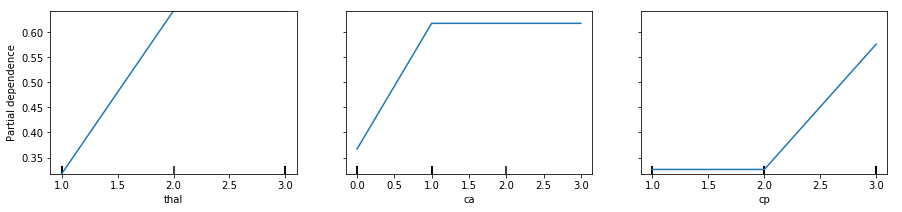

In [25]:
fig, ax = plt.subplots(figsize=(15, 3))
plot_partial_dependence(model, X, X.columns, feature_names=columns,ax=ax)
plt.show()

The effects of the changes on all features can be seen in the bivariate plots as well.
<li> "cp" = 3 raises the chance by almost 25%
<li> "thal" = 2 raises the chance by about 30%
<li> "ca" = 1 raises the chance by 25% approximately

<h2> Conclusion

In this analysis we tested some hypotheses about factors of heart disease found in the Heart Disease UCI dataset.<br>
Most hypotheses hold true but the one about the "thalach" feature wasn't and this needs to be investigated. 
Was this because a measurement error or its a pattern that appeared in this data? The dataset source needs to be checked.

The final model (Decision Tree) was created with 3 variables, "thal", "cp", and "ca", all positive associated with heart disease. Also, the model couldn't use more features because they didn't improve the gini impurity enough.
Associations were found between all other features (except "chol" and "fbs") with heart disease but with only those first 3 variables, the model scored 85% accuracy on the training data. 

Furthermore, this work can be improved by collecting more data and testing the created model against it. Also, with more data, more complex models can be tested, like ensembles and neural networks.